In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from lime.lime_tabular import LimeTabularExplainer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

In [76]:
# 2. Load Dataset
data = pd.read_csv("diabetes.csv")

In [77]:
# 3. Replace Zeroes with NaN in Specific Columns
cols_with_zeros = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]
data[cols_with_zeros] = data[cols_with_zeros].replace(0, np.nan)

In [78]:
# 4. Fill NaN with Mean Values
data.fillna(data.mean(), inplace=True)

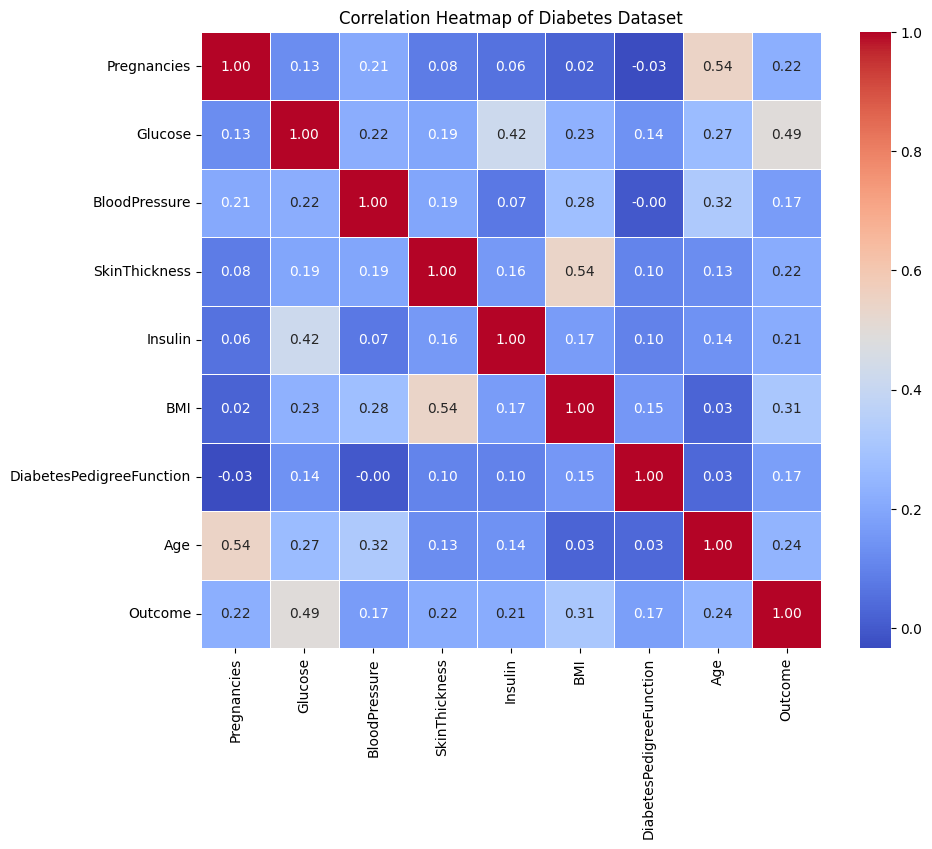

In [79]:
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Diabetes Dataset")
plt.show()

In [80]:
# 5. Feature and Target Split
X = data.drop("Outcome", axis=1)
y = data["Outcome"]

In [81]:
# 6. Feature Scaling to reduce bias
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [82]:
# 7. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)


In [ ]:
# 8. Train Random Forest Model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=3, min_samples_split=5,
                       random_state=42)

In [84]:
# 9. Evaluate the Model
y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7532467532467533

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.85      0.82       100
           1       0.67      0.57      0.62        54

    accuracy                           0.75       154
   macro avg       0.73      0.71      0.72       154
weighted avg       0.75      0.75      0.75       154



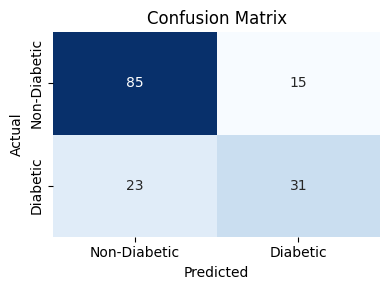

In [85]:
# Confusion Matrix Plot
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Non-Diabetic", "Diabetic"],
            yticklabels=["Non-Diabetic", "Diabetic"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()


In [86]:
# 10. Save Model and Scaler for Streamlit
joblib.dump(model, "rf_diabetes_model.pkl")
joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']

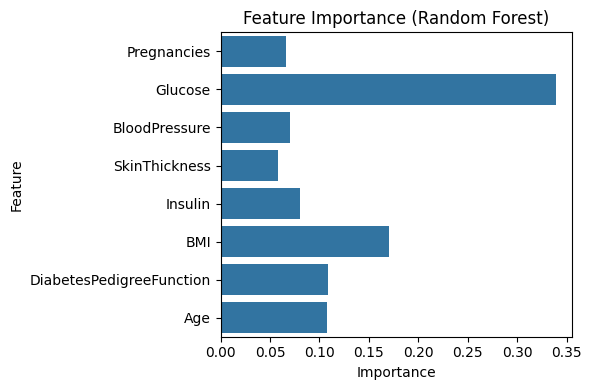

In [87]:
importances = model.feature_importances_
feature_names = X.columns

plt.figure(figsize=(6, 4))
sns.barplot(x=importances, y=feature_names)
plt.title("Feature Importance (Random Forest)")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

In [88]:
# Pick the first sample from the test set to explain
sample_idx = 0
sample_input = X_test[sample_idx]


In [89]:
explainer = LimeTabularExplainer(
    training_data=X_train,
    feature_names=X.columns.tolist(),
    class_names=["Non-Diabetic", "Diabetic"],
    mode="classification"
)


In [90]:
explanation = explainer.explain_instance(
    data_row=sample_input,
    predict_fn=model.predict_proba,
    num_features=8
)


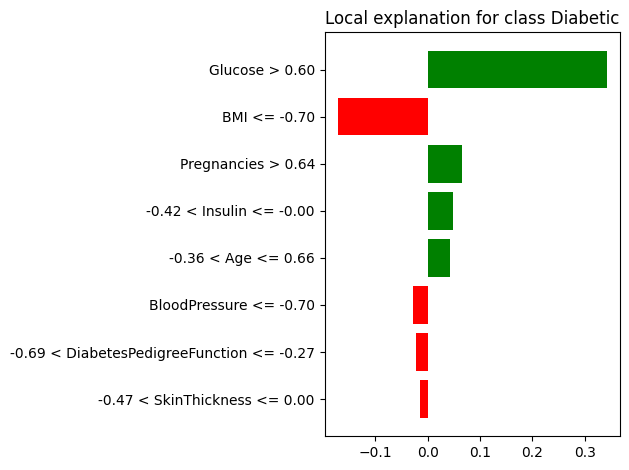

In [91]:
fig = explanation.as_pyplot_figure()
plt.tight_layout()
plt.show()


In [92]:
original_input = scaler.inverse_transform([sample_input])
original_df = pd.DataFrame(original_input, columns=X.columns)
print("Original Patient Input:")
display(original_df)


Original Patient Input:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,7.0,159.0,64.0,29.15342,155.548223,27.4,0.294,40.0
